In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
DOCUMENT = """
Millions of Muslims in Indonesia are gearing up to celebrate the holy month of Ramadan, which is expected to start on Thursday, with traditions and ceremonies across the world’s most populous Muslim-majority country amid soaring food prices.

From colorful torchlight street parades to cleaning relatives’ graves and sharing meals with family and friends, every region in the vast Southeast Asian archipelago seems to have its own way to mark the start of Ramadan, highlighting the nation’s diverse cultural heritage.

The country’s religious affairs minister on Wednesday evening will try to sight the crescent moon to determine the first day of the holy month. If the moon is not visible, as expected, the first day of Ramadan will be a day later. Most Indonesians — Muslims comprise nearly 90% of the country’s 277 million people — are expected to follow the government’s official date.

Indonesia’s second-largest Islamic group, Muhammadiyah, which counts more than 60 million members, said that according to its astronomical calculations Ramadan will begin on Thursday.

During Ramadan, Muslims refrain from eating, drinking, smoking and sexual intercourse from sunrise until sunset. Even a tiny sip of water or a puff of smoke is enough to invalidate the fast. At night, family and friends gather and feast in a festive atmosphere.

The fasting is aimed at bringing the faithful closer to God and reminding them of the suffering of the poor. Muslims are expected to strictly observe daily prayers and engage in heightened religious contemplation. They are also urged to refrain from gossip, fighting or cursing during the holy month.

Although Indonesia has more Muslims than any other country in the world, its Ramadan traditions have been influenced by other religions. Nyadran is a Javanese ritual heavily influenced by Hinduism and Buddhism that involves visiting ancestors’ gravesites to pay respect.

Each year, thousands of villagers who live on the slopes of Mount Merapi in Central Java visit cemeteries to welcome Ramadan. In the ritual, people clean and decorate gravesites and make prayers and offerings. They bring various foods in bamboo containers that they eat together after praying.

In other regions on the main island of Java, including in the capital, Jakarta, Muslims also mark the holy month by cleaning their relatives’ graves, scattering flower petals on them and praying for the deceased.

After evening prayers, many boys and girls across Jakarta parade through the streets of the densely populated neighborhoods to welcome the holy month. They carry torches and play Islamic songs accompanied by the beat of the rebana, the Arabic handheld percussion instrument.

People in Indonesia’s deeply conservative Aceh province celebrate the beginning of Ramadan with Meugang festivities by slaughtering animals such as oxen or buffalo, as well as smaller animals like chicken and ducks. The meat is then cooked and shared with family, friends and even the poor and orphans in a communal feast that aims to bring the community together.

Hundreds of residents in Tangerang, a city just outside Jakarta, flock to the Cisadane River to bathe in a tradition that involves washing one’s hair with rice straw shampoo to welcome the holy fasting month with a symbolic spiritual cleansing.

Islam follows a lunar calendar, so Ramadan begins around a week and a half earlier each year. At the end of Ramadan, Muslims celebrate the joyous Eid al-Fitr holiday, when children often receive new clothes and gifts.

Indonesia’s Trade Ministry has said prices of imported staple foods including wheat, sugar, beef and soybeans have increased sharply this year as a result of rising global commodity prices and supply chain disruptions, particularly following Russia’s invasion of Ukraine.

But many people say the rise in prices not only impacts imported foods but also local commodities like rice, eggs, chili, palm oil and onions. Gas and electricity prices have also gone up. Many blame the government for this.

Some Muslims worry how they will cope financially during Ramadan this year.

“Prices are going up every week. How come the government cannot help with this? Anything to do with cooking is rising,” said Yulia Ningsih, a mother of two who lives in Jakarta. “I worry that rising food and energy costs will impact Ramadan celebrations.”
"""

In [3]:
import re

DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()

In [4]:
sentences = nltk.sent_tokenize(DOCUMENT)
len(sentences)

34

In [5]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['millions muslims indonesia gearing celebrate holy month ramadan expected start thursday traditions ceremonies across worlds populous muslimmajority country amid soaring food prices',
       'colorful torchlight street parades cleaning relatives graves sharing meals family friends every region vast southeast asian archipelago seems way mark start ramadan highlighting nations diverse cultural heritage',
       'countrys religious affairs minister wednesday evening try sight crescent moon determine first day holy month'],
      dtype='<U229')

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names_out() 
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab)

(311, 34)


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
accompanied,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00
according,0.00,0.0,0.00,0.0,0.0,0.28,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00
aceh,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00
across,0.22,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00
affairs,0.00,0.0,0.28,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
world,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00
worlds,0.24,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00
worry,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.45,0.0,0.0,0.00,0.35
year,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.15,0.0,0.0,0.0,0.38,0.0,0.0,0.00,0.00


In [9]:
from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [10]:
num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(311, 3) (3,) (3, 34)


In [11]:
# remove singular values below threshold                                         
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [12]:
salience_scores = np.sqrt(np.dot(np.square(singular_values), 
                                 np.square(topic_document_mat)))
salience_scores

array([0.55463812, 0.31555702, 0.63060459, 0.51296986, 0.31570827,
       0.23766638, 0.31685426, 0.06378687, 0.27424868, 0.0754977 ,
       0.36616012, 0.43906007, 0.49296538, 0.09605529, 0.253102  ,
       0.17605406, 0.2828674 , 0.44906924, 0.54717341, 0.02674163,
       0.18668987, 0.34590422, 0.34123504, 0.3581987 , 0.32413672,
       0.43579413, 0.47283471, 0.43901076, 0.3721256 , 0.59186596,
       0.42730899, 0.2502144 , 0.14634806, 0.41990124])

In [13]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()

In [14]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

Millions of Muslims in Indonesia are gearing up to celebrate the holy month of Ramadan, which is expected to start on Thursday, with traditions and ceremonies across the world’s most populous Muslim-majority country amid soaring food prices.
The country’s religious affairs minister on Wednesday evening will try to sight the crescent moon to determine the first day of the holy month.
If the moon is not visible, as expected, the first day of Ramadan will be a day later.
Although Indonesia has more Muslims than any other country in the world, its Ramadan traditions have been influenced by other religions.
In other regions on the main island of Java, including in the capital, Jakarta, Muslims also mark the holy month by cleaning their relatives’ graves, scattering flower petals on them and praying for the deceased.
After evening prayers, many boys and girls across Jakarta parade through the streets of the densely populated neighborhoods to welcome the holy month.
But many people say the ri

In [15]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(34, 34)


array([[1.   , 0.052, 0.062, ..., 0.   , 0.   , 0.101],
       [0.052, 1.   , 0.   , ..., 0.   , 0.   , 0.021],
       [0.062, 0.   , 1.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 1.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 1.   , 0.088],
       [0.101, 0.021, 0.   , ..., 0.   , 0.088, 1.   ]])

In [16]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

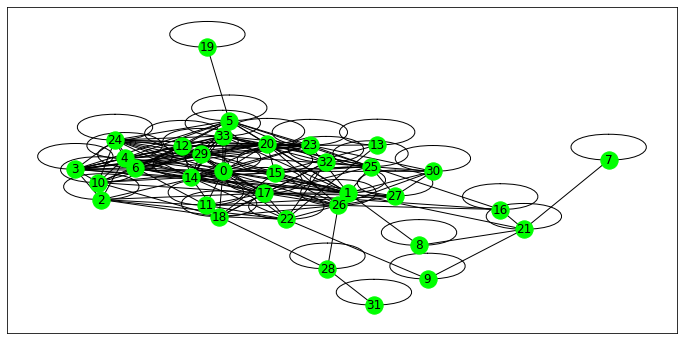

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [18]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]

[(0.04097537419802414, 0),
 (0.03545367288284794, 29),
 (0.03500543777772351, 17),
 (0.03320977024419268, 18),
 (0.032556496871864765, 21),
 (0.03221924591815773, 26),
 (0.03200729398542525, 12),
 (0.03094463640838454, 25),
 (0.030608453989774884, 2),
 (0.03009496616561446, 3)]

In [19]:
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [20]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

Millions of Muslims in Indonesia are gearing up to celebrate the holy month of Ramadan, which is expected to start on Thursday, with traditions and ceremonies across the world’s most populous Muslim-majority country amid soaring food prices.
Although Indonesia has more Muslims than any other country in the world, its Ramadan traditions have been influenced by other religions.
In other regions on the main island of Java, including in the capital, Jakarta, Muslims also mark the holy month by cleaning their relatives’ graves, scattering flower petals on them and praying for the deceased.
After evening prayers, many boys and girls across Jakarta parade through the streets of the densely populated neighborhoods to welcome the holy month.
The meat is then cooked and shared with family, friends and even the poor and orphans in a communal feast that aims to bring the community together.
Indonesia’s Trade Ministry has said prices of imported staple foods including wheat, sugar, beef and soybean